##  About this Project.


## Using the given dataset I have built a machine learning model which can predict the estimate price of laptop.

## In This notebook I have done these things >>>

### > Data Cleaning
### > Data Visualisation
### > Feature Engineering  
### > Model Selection
### > Model building [Using pipeline ]
### > Done !!

#### dataset source - from Github account of Campus X.

In [2]:
import pandas as pd
import numpy as np

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.tree import DecisionTreeClassifier

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/campusx-official/laptop-price-predictor-regression-project/main/laptop_data.csv")

In [6]:
df.head(3)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000


In [7]:
# about the data 

In [8]:
df.shape

(1303, 12)

In [9]:
df.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [10]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

### There is no null value !

## Feature Engineering

### > droping of unnecessory columns

In [11]:
df= df.drop(columns=['Unnamed: 0'], axis=1)

In [12]:
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232


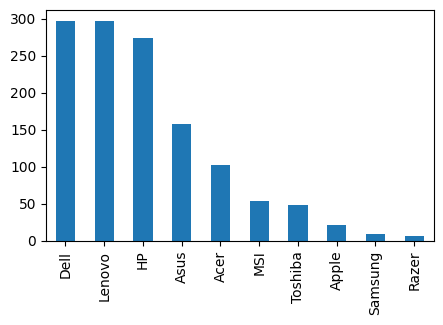

In [13]:
plt.figure(figsize=(5,3))
df.Company.value_counts().head(10).plot(kind="bar")
plt.show()          


In [14]:
df.ScreenResolution.value_counts().head(8)

Full HD 1920x1080                            507
1366x768                                     281
IPS Panel Full HD 1920x1080                  230
IPS Panel Full HD / Touchscreen 1920x1080     53
Full HD / Touchscreen 1920x1080               47
1600x900                                      23
Touchscreen 1366x768                          16
Quad HD+ / Touchscreen 3200x1800              15
Name: ScreenResolution, dtype: int64

### Creating a new column named HD from Screen Resolution column 

- using this we will split which device is HD and which is not .

In [15]:
df['HD']= df.ScreenResolution.apply(lambda x: 1 if "HD" in x else 0)

In [16]:
df.head(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,HD
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,1


In [17]:
df.HD.value_counts()

1    916
0    387
Name: HD, dtype: int64

# 2nd column

### for touchscreen identifying that it have tochscreen feature is available or not.

In [18]:
df['Touchscreen'] = df.ScreenResolution.apply(lambda x: 1 if "Touchscreen" in x else 0)

In [19]:
df.head(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,HD,Touchscreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,1,0


In [20]:
df.Touchscreen.value_counts()


0    1111
1     192
Name: Touchscreen, dtype: int64

In [21]:
df.Company.value_counts()

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

In [22]:
df.head(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,HD,Touchscreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,1,0


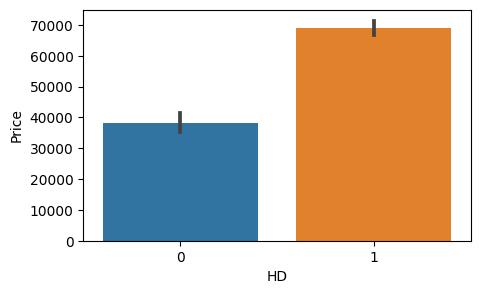

In [23]:
plt.figure(figsize=(5,3))
sns.barplot(x=df.HD,y=df.Price)
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_9500\824416946.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Price)


<Axes: xlabel='Price', ylabel='Density'>

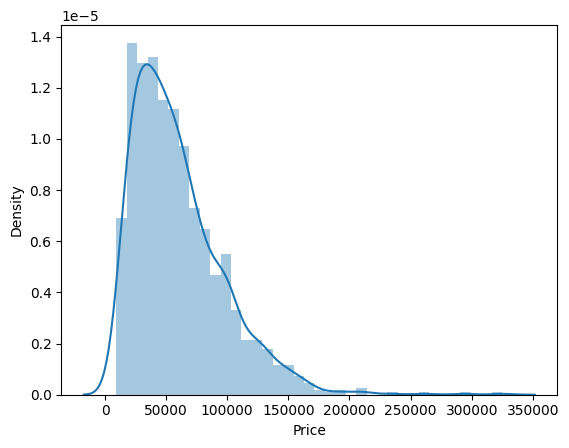

In [24]:
sns.distplot(df.Price)

#### we can see that the distribution of Price is right skewed. 
#### most of the laptop's price are in between 20k to 100k.

In [25]:
df.Price.median(), df.Price.mean()#, df.Price.mode()

(52054.56, 59870.042910207216)

In [26]:
df[df.Price>150000].shape

(29, 13)

C:\Users\DELL\AppData\Local\Temp\ipykernel_9500\223565188.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.HD)


<Axes: xlabel='HD', ylabel='Density'>

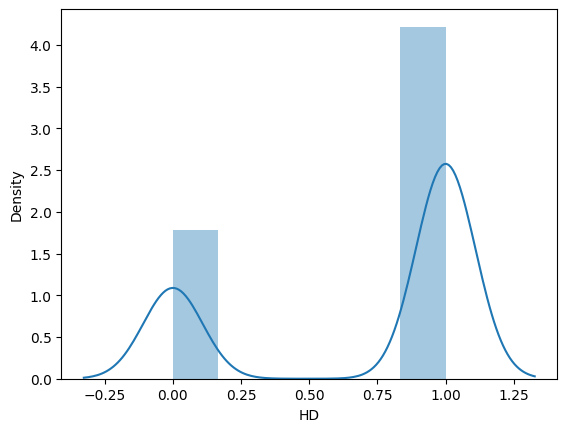

In [27]:
sns.distplot(df.HD)

In [28]:
df.ScreenResolution.value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

### Screen Resolution

# 3rd column

In [29]:
df['IPS'] = df.ScreenResolution.apply(lambda x:1 if "IPS" in x else 0)

In [30]:
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,HD,Touchscreen,IPS
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,0


In [31]:
df.Cpu.value_counts().head(10)

Intel Core i5 7200U 2.5GHz     190
Intel Core i7 7700HQ 2.8GHz    146
Intel Core i7 7500U 2.7GHz     134
Intel Core i7 8550U 1.8GHz      73
Intel Core i5 8250U 1.6GHz      72
Intel Core i5 6200U 2.3GHz      68
Intel Core i3 6006U 2GHz        64
Intel Core i7 6500U 2.5GHz      49
Intel Core i7 6700HQ 2.6GHz     43
Intel Core i3 7100U 2.4GHz      37
Name: Cpu, dtype: int64

In [32]:
a= " Sarvesh is good boy"

In [33]:
a.replace("is","are")

' Sarvesh are good boy'

In [34]:
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,HD,Touchscreen,IPS
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,0


In [35]:
df.Company.value_counts()

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

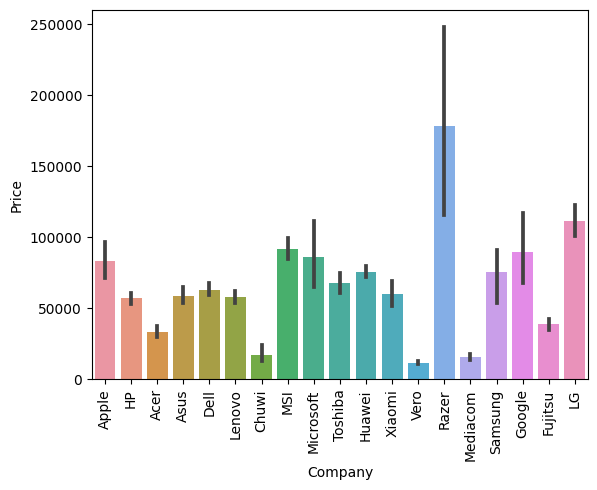

In [36]:
sns.barplot(x=df.Company,y = df.Price)
plt.xticks(rotation= 'vertical')
plt.show()

In [37]:
a= df[df.Company=="Razer"]

In [38]:
a.Price.value_counts()

324954.72    1
138474.72    1
154458.72    1
95850.72     1
292986.72    1
54825.12     1
186426.72    1
Name: Price, dtype: int64

In [39]:
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,HD,Touchscreen,IPS
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,0


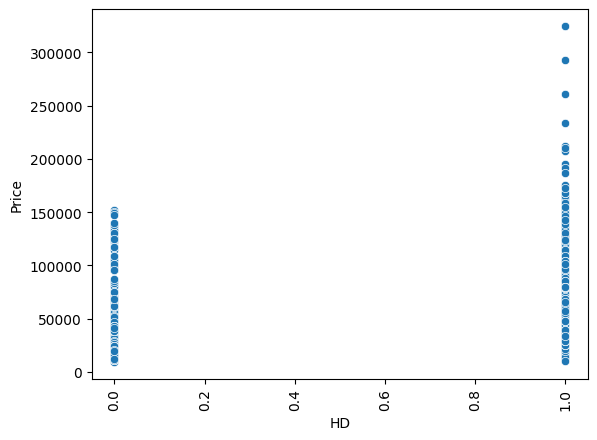

In [40]:
sns.scatterplot(x=df.HD,y= df.Price)
plt.xticks(rotation = "vertical")
plt.show()

<Axes: xlabel='HD', ylabel='Price'>

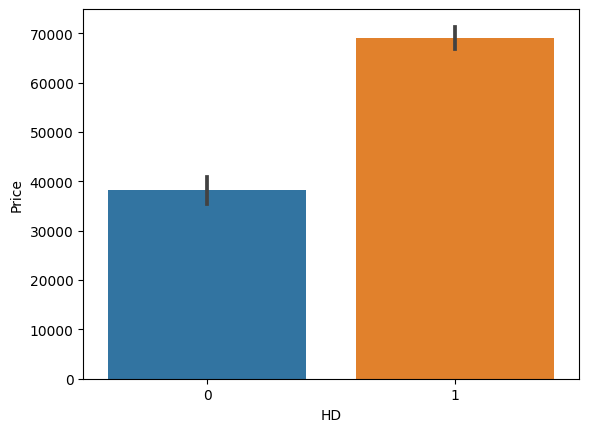

In [41]:
sns.barplot(x=df.HD,y= df.Price)

In [46]:
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,HD,Touchscreen,IPS
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,0


In [48]:
# Cpu 

In [49]:
df.Cpu.value_counts().head(10)

Intel Core i5 7200U 2.5GHz     190
Intel Core i7 7700HQ 2.8GHz    146
Intel Core i7 7500U 2.7GHz     134
Intel Core i7 8550U 1.8GHz      73
Intel Core i5 8250U 1.6GHz      72
Intel Core i5 6200U 2.3GHz      68
Intel Core i3 6006U 2GHz        64
Intel Core i7 6500U 2.5GHz      49
Intel Core i7 6700HQ 2.6GHz     43
Intel Core i3 7100U 2.4GHz      37
Name: Cpu, dtype: int64

In [50]:
df['Cpu_name'] = df.Cpu.apply(lambda x: " ".join(x.split()[0:3]))

In [51]:
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,HD,Touchscreen,IPS,Cpu_name
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0,0,1,Intel Core i5
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,0,Intel Core i5


In [52]:
df['GH'] = df.Cpu.apply(lambda x: " ".join(x.split()[4:5]))

In [53]:
df.head(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,HD,Touchscreen,IPS,Cpu_name,GH
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0,0,1,Intel Core i5,
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,0,Intel Core i5,
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,1,0,0,Intel Core i5,2.5GHz


In [54]:
df['GH']=df.GH.replace("GHz","")

In [55]:
df.head(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,HD,Touchscreen,IPS,Cpu_name,GH
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0,0,1,Intel Core i5,
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,0,Intel Core i5,
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,1,0,0,Intel Core i5,2.5GHz


In [56]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,HD,Touchscreen,IPS,Cpu_name,GH
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0,0,1,Intel Core i5,
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,0,Intel Core i5,
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,1,0,0,Intel Core i5,2.5GHz
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,0,0,1,Intel Core i7,
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,0,0,1,Intel Core i5,


In [57]:
df.Cpu_name.value_counts()

Intel Core i7               527
Intel Core i5               423
Intel Core i3               136
Intel Celeron Dual           80
Intel Pentium Quad           27
Intel Core M                 19
AMD A9-Series 9420           12
Intel Celeron Quad            8
AMD A6-Series 9220            8
AMD A12-Series 9720P          7
Intel Atom x5-Z8350           5
AMD A8-Series 7410            4
Intel Atom x5-Z8550           4
Intel Pentium Dual            3
AMD A9-Series 9410            3
AMD Ryzen 1700                3
AMD A9-Series A9-9420         2
AMD A10-Series 9620P          2
Intel Atom X5-Z8350           2
AMD E-Series E2-9000e         2
Intel Xeon E3-1535M           2
Intel Xeon E3-1505M           2
AMD E-Series 7110             2
AMD A10-Series 9600P          2
AMD A6-Series A6-9220         2
AMD A10-Series A10-9620P      2
AMD Ryzen 1600                1
Intel Atom x5-Z8300           1
AMD E-Series E2-6110          1
AMD FX 9830P                  1
AMD E-Series E2-9000          1
AMD A6-S

[]

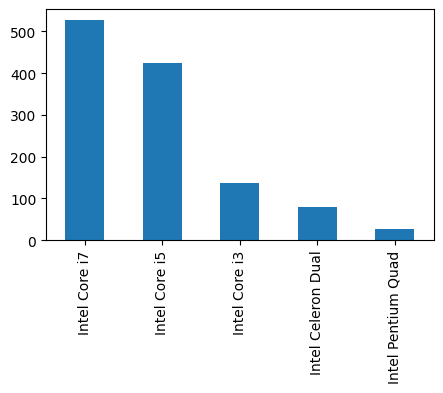

In [58]:
plt.figure(figsize=(5,3))
df.Cpu_name.value_counts().head(5).plot(kind='bar')
plt.plot()

In [59]:
def chek(processor):
    if processor == "Intel Core i7" or processor == "Intel Core i5" or processor == "Intel Core i3":
        return processor
    else:
        if processor.split()[0]== "Intel":
            return "Other Intel processor"
        else:
            return "AMD"

In [60]:
df['cpu_brand'] = df.Cpu_name.apply(chek)

In [61]:
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,HD,Touchscreen,IPS,Cpu_name,GH,cpu_brand
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0,0,1,Intel Core i5,,Intel Core i5
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,0,Intel Core i5,,Intel Core i5


In [62]:
df.cpu_brand.value_counts()

Intel Core i7            527
Intel Core i5            423
Other Intel processor    154
Intel Core i3            136
AMD                       63
Name: cpu_brand, dtype: int64

In [63]:
df.drop(columns=['Cpu','Cpu_name'], inplace=True)

In [64]:
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price,HD,Touchscreen,IPS,GH,cpu_brand
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0,0,1,,Intel Core i5
1,Apple,Ultrabook,13.3,1440x900,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,0,,Intel Core i5


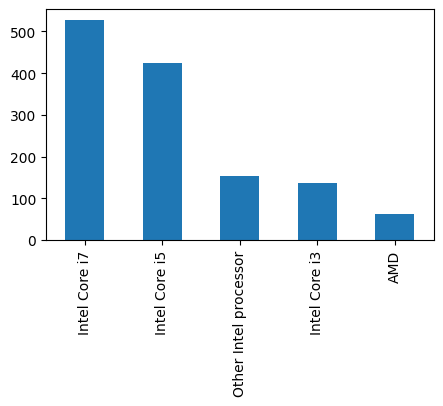

In [65]:
plt.figure(figsize=(5,3))
df.cpu_brand.value_counts().plot(kind='bar')
plt.show()

In [66]:
df['Ram'] = df['Ram'].str.replace('GB',"")

In [67]:
df.Weight= df.Weight.str.replace("kg","")

In [68]:
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price,HD,Touchscreen,IPS,GH,cpu_brand
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,0,1,,Intel Core i5
1,Apple,Ultrabook,13.3,1440x900,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,0,,Intel Core i5


<Axes: xlabel='Ram', ylabel='Price'>

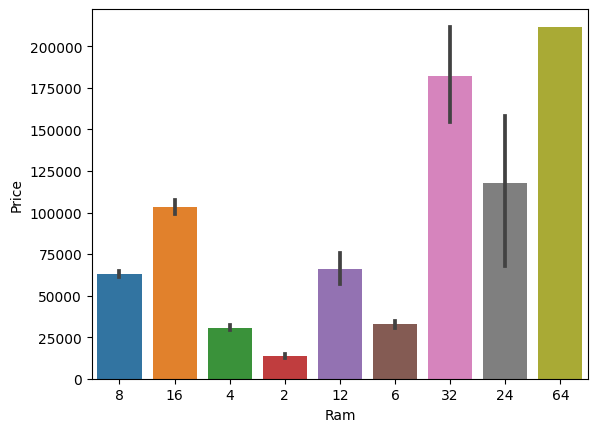

In [69]:
sns.barplot(x=df.Ram,y= df.Price)

<Axes: xlabel='Ram', ylabel='Price'>

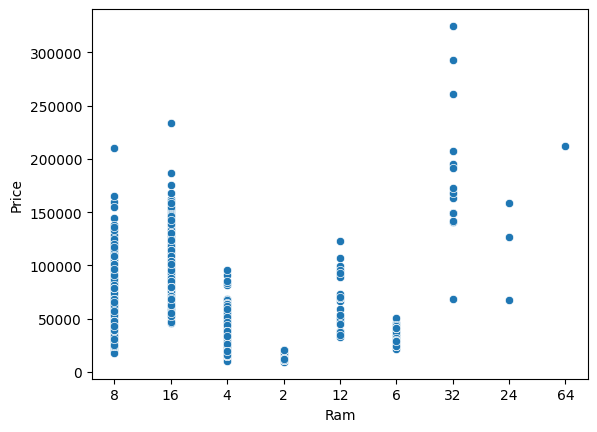

In [70]:
sns.scatterplot(x=df.Ram,y= df.Price)

In [71]:
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price,HD,Touchscreen,IPS,GH,cpu_brand
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,0,1,,Intel Core i5
1,Apple,Ultrabook,13.3,1440x900,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,0,,Intel Core i5


## Now We have only 3 . Memory , GPU, Opsys

In [72]:
df.Memory.value_counts().head(6)

256GB SSD               412
1TB HDD                 223
500GB HDD               132
512GB SSD               118
128GB SSD +  1TB HDD     94
128GB SSD                76
Name: Memory, dtype: int64

In [73]:
df['memory'] = df['Memory'].apply(lambda x: " ".join(x.split()[0:1]))

In [74]:
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price,HD,Touchscreen,IPS,GH,cpu_brand,memory
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,0,1,,Intel Core i5,128GB
1,Apple,Ultrabook,13.3,1440x900,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,0,,Intel Core i5,128GB


In [75]:
df.memory= df.memory.str.replace("GB","")

In [76]:
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price,HD,Touchscreen,IPS,GH,cpu_brand,memory
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,0,1,,Intel Core i5,128
1,Apple,Ultrabook,13.3,1440x900,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,0,,Intel Core i5,128


In [77]:
df.memory.value_counts()

256      508
1TB      240
128      177
512      140
500      132
32        45
64        17
2TB       16
1.0TB     10
16        10
180        5
240        1
8          1
508        1
Name: memory, dtype: int64

In [78]:
df.memory= df.memory.str.replace("TB","000")

In [79]:
df.memory.value_counts()

256       508
1000      240
128       177
512       140
500       132
32         45
64         17
2000       16
1.0000     10
16         10
180         5
240         1
8           1
508         1
Name: memory, dtype: int64

In [80]:
df.head(3)

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price,HD,Touchscreen,IPS,GH,cpu_brand,memory
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,0,1,,Intel Core i5,128
1,Apple,Ultrabook,13.3,1440x900,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,0,,Intel Core i5,128
2,HP,Notebook,15.6,Full HD 1920x1080,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,1,0,0,2.5GHz,Intel Core i5,256


In [81]:
df.Memory.value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [82]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price,HD,Touchscreen,IPS,GH,cpu_brand,memory
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,0,1,,Intel Core i5,128
1,Apple,Ultrabook,13.3,1440x900,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,0,,Intel Core i5,128
2,HP,Notebook,15.6,Full HD 1920x1080,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,1,0,0,2.5GHz,Intel Core i5,256
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,0,1,,Intel Core i7,512
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,0,1,,Intel Core i5,256


In [83]:
df.OpSys.value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [84]:
df['Memory_chek'] = df['Memory'].astype(str).replace('\.0', '', regex=True)

In [85]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price,HD,Touchscreen,IPS,GH,cpu_brand,memory,Memory_chek
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,0,1,,Intel Core i5,128,128GB SSD
1,Apple,Ultrabook,13.3,1440x900,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,0,,Intel Core i5,128,128GB Flash Storage
2,HP,Notebook,15.6,Full HD 1920x1080,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,1,0,0,2.5GHz,Intel Core i5,256,256GB SSD
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,0,1,,Intel Core i7,512,512GB SSD
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,0,1,,Intel Core i5,256,256GB SSD


In [86]:
a= df[['Memory',"Memory_chek"]]
a

,Memory,Memory_chek
0,128GB SSD,128GB SSD
1,128GB Flash Storage,128GB Flash Storage
2,256GB SSD,256GB SSD
3,512GB SSD,512GB SSD
4,256GB SSD,256GB SSD
...,...,...
1298,128GB SSD,128GB SSD
1299,512GB SSD,512GB SSD
1300,64GB Flash Storage,64GB Flash Storage
1301,1TB HDD,1TB HDD


In [87]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Memory       1303 non-null   object
 1   Memory_chek  1303 non-null   object
dtypes: object(2)
memory usage: 20.5+ KB


In [88]:
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price,HD,Touchscreen,IPS,GH,cpu_brand,memory,Memory_chek
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,0,1,,Intel Core i5,128,128GB SSD
1,Apple,Ultrabook,13.3,1440x900,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,0,,Intel Core i5,128,128GB Flash Storage


In [89]:
new = df["Memory"].str.split("+", n = 1, expand = True)


In [90]:
new

,0,1
0,128GB SSD,None
1,128GB Flash Storage,None
2,256GB SSD,None
3,512GB SSD,None
4,256GB SSD,None
...,...,...
1298,128GB SSD,None
1299,512GB SSD,None
1300,64GB Flash Storage,None
1301,1TB HDD,None


In [91]:
a = new[0]

In [92]:
df.Gpu.value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [93]:
data = df.Gpu.str.split(" ", n= 3,  expand= True)

In [94]:
data

,0,1,2,3
0,Intel,Iris,Plus,Graphics 640
1,Intel,HD,Graphics,6000
2,Intel,HD,Graphics,620
3,AMD,Radeon,Pro,455
4,Intel,Iris,Plus,Graphics 650
...,...,...,...,...
1298,Intel,HD,Graphics,520
1299,Intel,HD,Graphics,520
1300,Intel,HD,Graphics,None
1301,AMD,Radeon,R5,M330


In [95]:
df['gpu_brand'] = df.Gpu.apply(lambda x: x.split()[0])

In [96]:
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price,HD,Touchscreen,IPS,GH,cpu_brand,memory,Memory_chek,gpu_brand
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,0,1,,Intel Core i5,128,128GB SSD,Intel
1,Apple,Ultrabook,13.3,1440x900,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,0,,Intel Core i5,128,128GB Flash Storage,Intel


<Axes: >

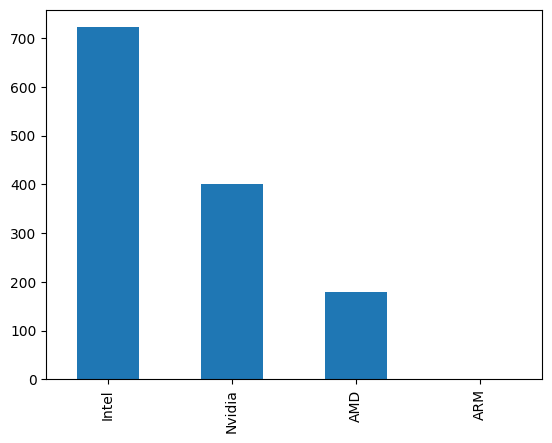

In [97]:
df.gpu_brand.value_counts().plot(kind='bar')

In [98]:
df.gpu_brand.value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: gpu_brand, dtype: int64

In [99]:
df= df[df.gpu_brand!="ARM"]

In [100]:
df.gpu_brand.value_counts()

Intel     722
Nvidia    400
AMD       180
Name: gpu_brand, dtype: int64

In [101]:
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price,HD,Touchscreen,IPS,GH,cpu_brand,memory,Memory_chek,gpu_brand
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,0,1,,Intel Core i5,128,128GB SSD,Intel
1,Apple,Ultrabook,13.3,1440x900,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,0,,Intel Core i5,128,128GB Flash Storage,Intel


In [102]:
df.drop(columns=['Gpu','Memory_chek'],inplace=True)

In [103]:
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,OpSys,Weight,Price,HD,Touchscreen,IPS,GH,cpu_brand,memory,gpu_brand
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,128GB SSD,macOS,1.37,71378.6832,0,0,1,,Intel Core i5,128,Intel
1,Apple,Ultrabook,13.3,1440x900,8,128GB Flash Storage,macOS,1.34,47895.5232,0,0,0,,Intel Core i5,128,Intel


<Axes: xlabel='gpu_brand', ylabel='Price'>

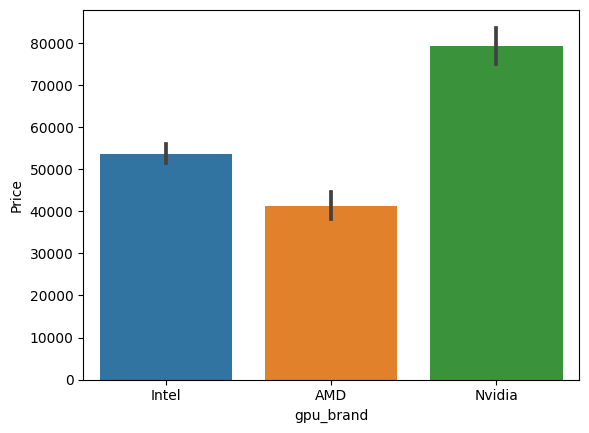

In [104]:
sns.barplot(x= df.gpu_brand,y = df.Price)

<Axes: xlabel='gpu_brand', ylabel='Price'>

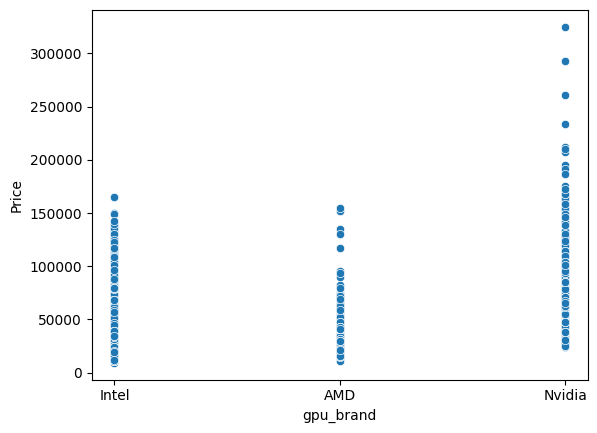

In [105]:
sns.scatterplot(x= df.gpu_brand,y = df.Price)

In [106]:
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,OpSys,Weight,Price,HD,Touchscreen,IPS,GH,cpu_brand,memory,gpu_brand
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,128GB SSD,macOS,1.37,71378.6832,0,0,1,,Intel Core i5,128,Intel
1,Apple,Ultrabook,13.3,1440x900,8,128GB Flash Storage,macOS,1.34,47895.5232,0,0,0,,Intel Core i5,128,Intel


In [107]:
df.OpSys.value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [108]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Ram', 'Memory',
       'OpSys', 'Weight', 'Price', 'HD', 'Touchscreen', 'IPS', 'GH',
       'cpu_brand', 'memory', 'gpu_brand'],
      dtype='object')

In [109]:
df.columns[2:5]

Index(['Inches', 'ScreenResolution', 'Ram'], dtype='object')

In [110]:
for i in range (15):
    print(df.columns[i],"-",i)

Company - 0
TypeName - 1
Inches - 2
ScreenResolution - 3
Ram - 4
Memory - 5
OpSys - 6
Weight - 7
Price - 8
HD - 9
Touchscreen - 10
IPS - 11
GH - 12
cpu_brand - 13
memory - 14


In [111]:
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,OpSys,Weight,Price,HD,Touchscreen,IPS,GH,cpu_brand,memory,gpu_brand
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,128GB SSD,macOS,1.37,71378.6832,0,0,1,,Intel Core i5,128,Intel
1,Apple,Ultrabook,13.3,1440x900,8,128GB Flash Storage,macOS,1.34,47895.5232,0,0,0,,Intel Core i5,128,Intel


In [112]:
len(df.columns)

16

In [113]:
df = df.drop(columns=['ScreenResolution', 'Memory'], axis =1)

In [114]:
df = df.drop(columns=['GH'], axis =1)

In [115]:
df.head(2)

,Company,TypeName,Inches,Ram,OpSys,Weight,Price,HD,Touchscreen,IPS,cpu_brand,memory,gpu_brand
0,Apple,Ultrabook,13.3,8,macOS,1.37,71378.6832,0,0,1,Intel Core i5,128,Intel
1,Apple,Ultrabook,13.3,8,macOS,1.34,47895.5232,0,0,0,Intel Core i5,128,Intel


<Axes: xlabel='IPS', ylabel='Price'>

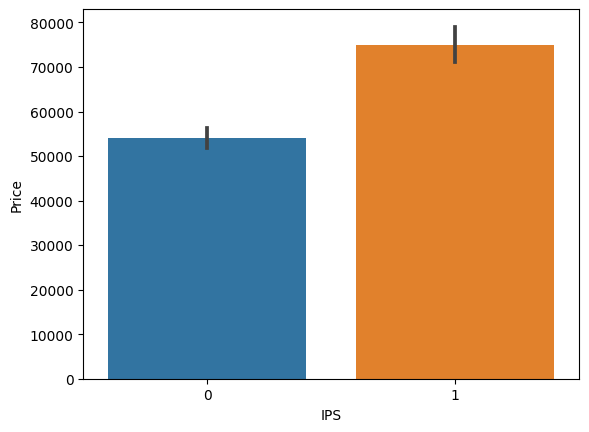

In [116]:
sns.barplot(x= df.IPS,y=df.Price)

In [117]:
df.isnull().sum()

Company        0
TypeName       0
Inches         0
Ram            0
OpSys          0
Weight         0
Price          0
HD             0
Touchscreen    0
IPS            0
cpu_brand      0
memory         0
gpu_brand      0
dtype: int64

In [118]:
df2 = df.copy()

In [119]:
df2.head(3)

,Company,TypeName,Inches,Ram,OpSys,Weight,Price,HD,Touchscreen,IPS,cpu_brand,memory,gpu_brand
0,Apple,Ultrabook,13.3,8,macOS,1.37,71378.6832,0,0,1,Intel Core i5,128,Intel
1,Apple,Ultrabook,13.3,8,macOS,1.34,47895.5232,0,0,0,Intel Core i5,128,Intel
2,HP,Notebook,15.6,8,No OS,1.86,30636.0000,1,0,0,Intel Core i5,256,Intel


## Final Dataframe

In [120]:
df.head(2)

,Company,TypeName,Inches,Ram,OpSys,Weight,Price,HD,Touchscreen,IPS,cpu_brand,memory,gpu_brand
0,Apple,Ultrabook,13.3,8,macOS,1.37,71378.6832,0,0,1,Intel Core i5,128,Intel
1,Apple,Ultrabook,13.3,8,macOS,1.34,47895.5232,0,0,0,Intel Core i5,128,Intel


In [121]:
X = df.drop(columns=['Price'])
y = np.log(df['Price'])

In [122]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [123]:
from sklearn.metrics import accuracy_score ,r2_score, mean_absolute_error

## making of Pipeline

In [127]:
from sklearn.linear_model import LinearRegression

In [131]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,4,9,11])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7798560287399877
MAE 0.22215960781963665


C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### R2_score = 77.98%

In [132]:
pipe

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [0, 1, 4, 9, 11])])),
                ('step2', LinearRegression())])

## Done !!